# LIBRERIAS

In [1]:
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math

from statistics import mean 
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

C:\Users\migue\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# LECTURA DE DATOS

In [3]:
# Leo los indicadores

indra = pd.read_excel('./data/Datos Acciones renta variable.xlsx', sheet_name='Hoja1', 
                           usecols=['Date', 'Indra'])

indra.columns = ['Date','Precio']
indra['Date'] = pd.to_datetime(indra['Date'], format="%Y-%m-%d")
indra = indra.set_index('Date')
indra = indra.loc['2015-04-30':,:]

In [4]:
indra.head()

,Precio
Date,
2015-04-30,10.560
2015-05-01,10.560
2015-05-04,10.710
2015-05-05,10.335
2015-05-06,10.390


In [5]:
# Calculo los retornos de cada día

indra['Retornos diarios'] = 0

for i in range(1, len(indra)):
    
    indra['Retornos diarios'].iloc[i] = indra.Precio.iloc[i] - indra.Precio.iloc[i-1]


In [6]:
# Visualizo una muestra

indra.head(20)

,Precio,Retornos diarios
Date,,
2015-04-30,10.560,0.000
2015-05-01,10.560,0.000
2015-05-04,10.710,0.150
2015-05-05,10.335,-0.375
2015-05-06,10.390,0.055
2015-05-07,10.295,-0.095
2015-05-08,10.450,0.155
2015-05-11,10.450,0.000
2015-05-12,9.700,-0.750


In [7]:
# Calculo las ganancias y pérdidas // Tuve que meter un cero porque si dejo un string vacío o np.nan da problemas y 
# paso de comerme la cabeza, habra una solucion mejor pero esta es rapida

indra['Ganancias'] = np.where((indra['Retornos diarios']>0), round(indra['Retornos diarios'],4), 0)
indra['Perdidas'] = np.where((indra['Retornos diarios']<0), round(indra['Retornos diarios'],4), 0)

In [8]:
# Visualizo una muestra

indra.head(10)

,Precio,Retornos diarios,Ganancias,Perdidas
Date,,,,
2015-04-30,10.560,0.000,0.000,0.000
2015-05-01,10.560,0.000,0.000,0.000
2015-05-04,10.710,0.150,0.150,0.000
2015-05-05,10.335,-0.375,0.000,-0.375
2015-05-06,10.390,0.055,0.055,0.000
2015-05-07,10.295,-0.095,0.000,-0.095
2015-05-08,10.450,0.155,0.155,0.000
2015-05-11,10.450,0.000,0.000,0.000
2015-05-12,9.700,-0.750,0.000,-0.750


In [9]:
# Ahora calculo la media de ganancias y pérdidas en periodos de 14 dias

indra['Media ganancias'] = indra.Ganancias.rolling(window=14).mean()
indra['Media perdidas'] = indra.Perdidas.rolling(window=14).mean()

In [10]:
# Visualizo una muestra

indra.head(20)

,Precio,Retornos diarios,Ganancias,Perdidas,Media ganancias,Media perdidas
Date,,,,,,
2015-04-30,10.560,0.000,0.000,0.000,NaN,NaN
2015-05-01,10.560,0.000,0.000,0.000,NaN,NaN
2015-05-04,10.710,0.150,0.150,0.000,NaN,NaN
2015-05-05,10.335,-0.375,0.000,-0.375,NaN,NaN
2015-05-06,10.390,0.055,0.055,0.000,NaN,NaN
2015-05-07,10.295,-0.095,0.000,-0.095,NaN,NaN
2015-05-08,10.450,0.155,0.155,0.000,NaN,NaN
2015-05-11,10.450,0.000,0.000,0.000,NaN,NaN
2015-05-12,9.700,-0.750,0.000,-0.750,NaN,NaN


In [11]:
# Calculo el RS, el cociente entre ganancias medias y perdidas medias

indra['RS'] = abs(indra['Media ganancias'] / indra['Media perdidas'])

In [12]:
# Visualizo una muestra

indra.head(20)

,Precio,Retornos diarios,Ganancias,Perdidas,Media ganancias,Media perdidas,RS
Date,,,,,,,
2015-04-30,10.560,0.000,0.000,0.000,NaN,NaN,NaN
2015-05-01,10.560,0.000,0.000,0.000,NaN,NaN,NaN
2015-05-04,10.710,0.150,0.150,0.000,NaN,NaN,NaN
2015-05-05,10.335,-0.375,0.000,-0.375,NaN,NaN,NaN
2015-05-06,10.390,0.055,0.055,0.000,NaN,NaN,NaN
2015-05-07,10.295,-0.095,0.000,-0.095,NaN,NaN,NaN
2015-05-08,10.450,0.155,0.155,0.000,NaN,NaN,NaN
2015-05-11,10.450,0.000,0.000,0.000,NaN,NaN,NaN
2015-05-12,9.700,-0.750,0.000,-0.750,NaN,NaN,NaN


In [13]:
# Ahora calculo RSI, la formula es 100 - 100 / (1 + RS)

indra['RSI'] = 100 - 100 / (1 + indra['RS'])

In [14]:
# Visualizo una muestra

indra.head(20)

,Precio,Retornos diarios,Ganancias,Perdidas,Media ganancias,Media perdidas,RS,RSI
Date,,,,,,,,
2015-04-30,10.560,0.000,0.000,0.000,NaN,NaN,NaN,NaN
2015-05-01,10.560,0.000,0.000,0.000,NaN,NaN,NaN,NaN
2015-05-04,10.710,0.150,0.150,0.000,NaN,NaN,NaN,NaN
2015-05-05,10.335,-0.375,0.000,-0.375,NaN,NaN,NaN,NaN
2015-05-06,10.390,0.055,0.055,0.000,NaN,NaN,NaN,NaN
2015-05-07,10.295,-0.095,0.000,-0.095,NaN,NaN,NaN,NaN
2015-05-08,10.450,0.155,0.155,0.000,NaN,NaN,NaN,NaN
2015-05-11,10.450,0.000,0.000,0.000,NaN,NaN,NaN,NaN
2015-05-12,9.700,-0.750,0.000,-0.750,NaN,NaN,NaN,NaN


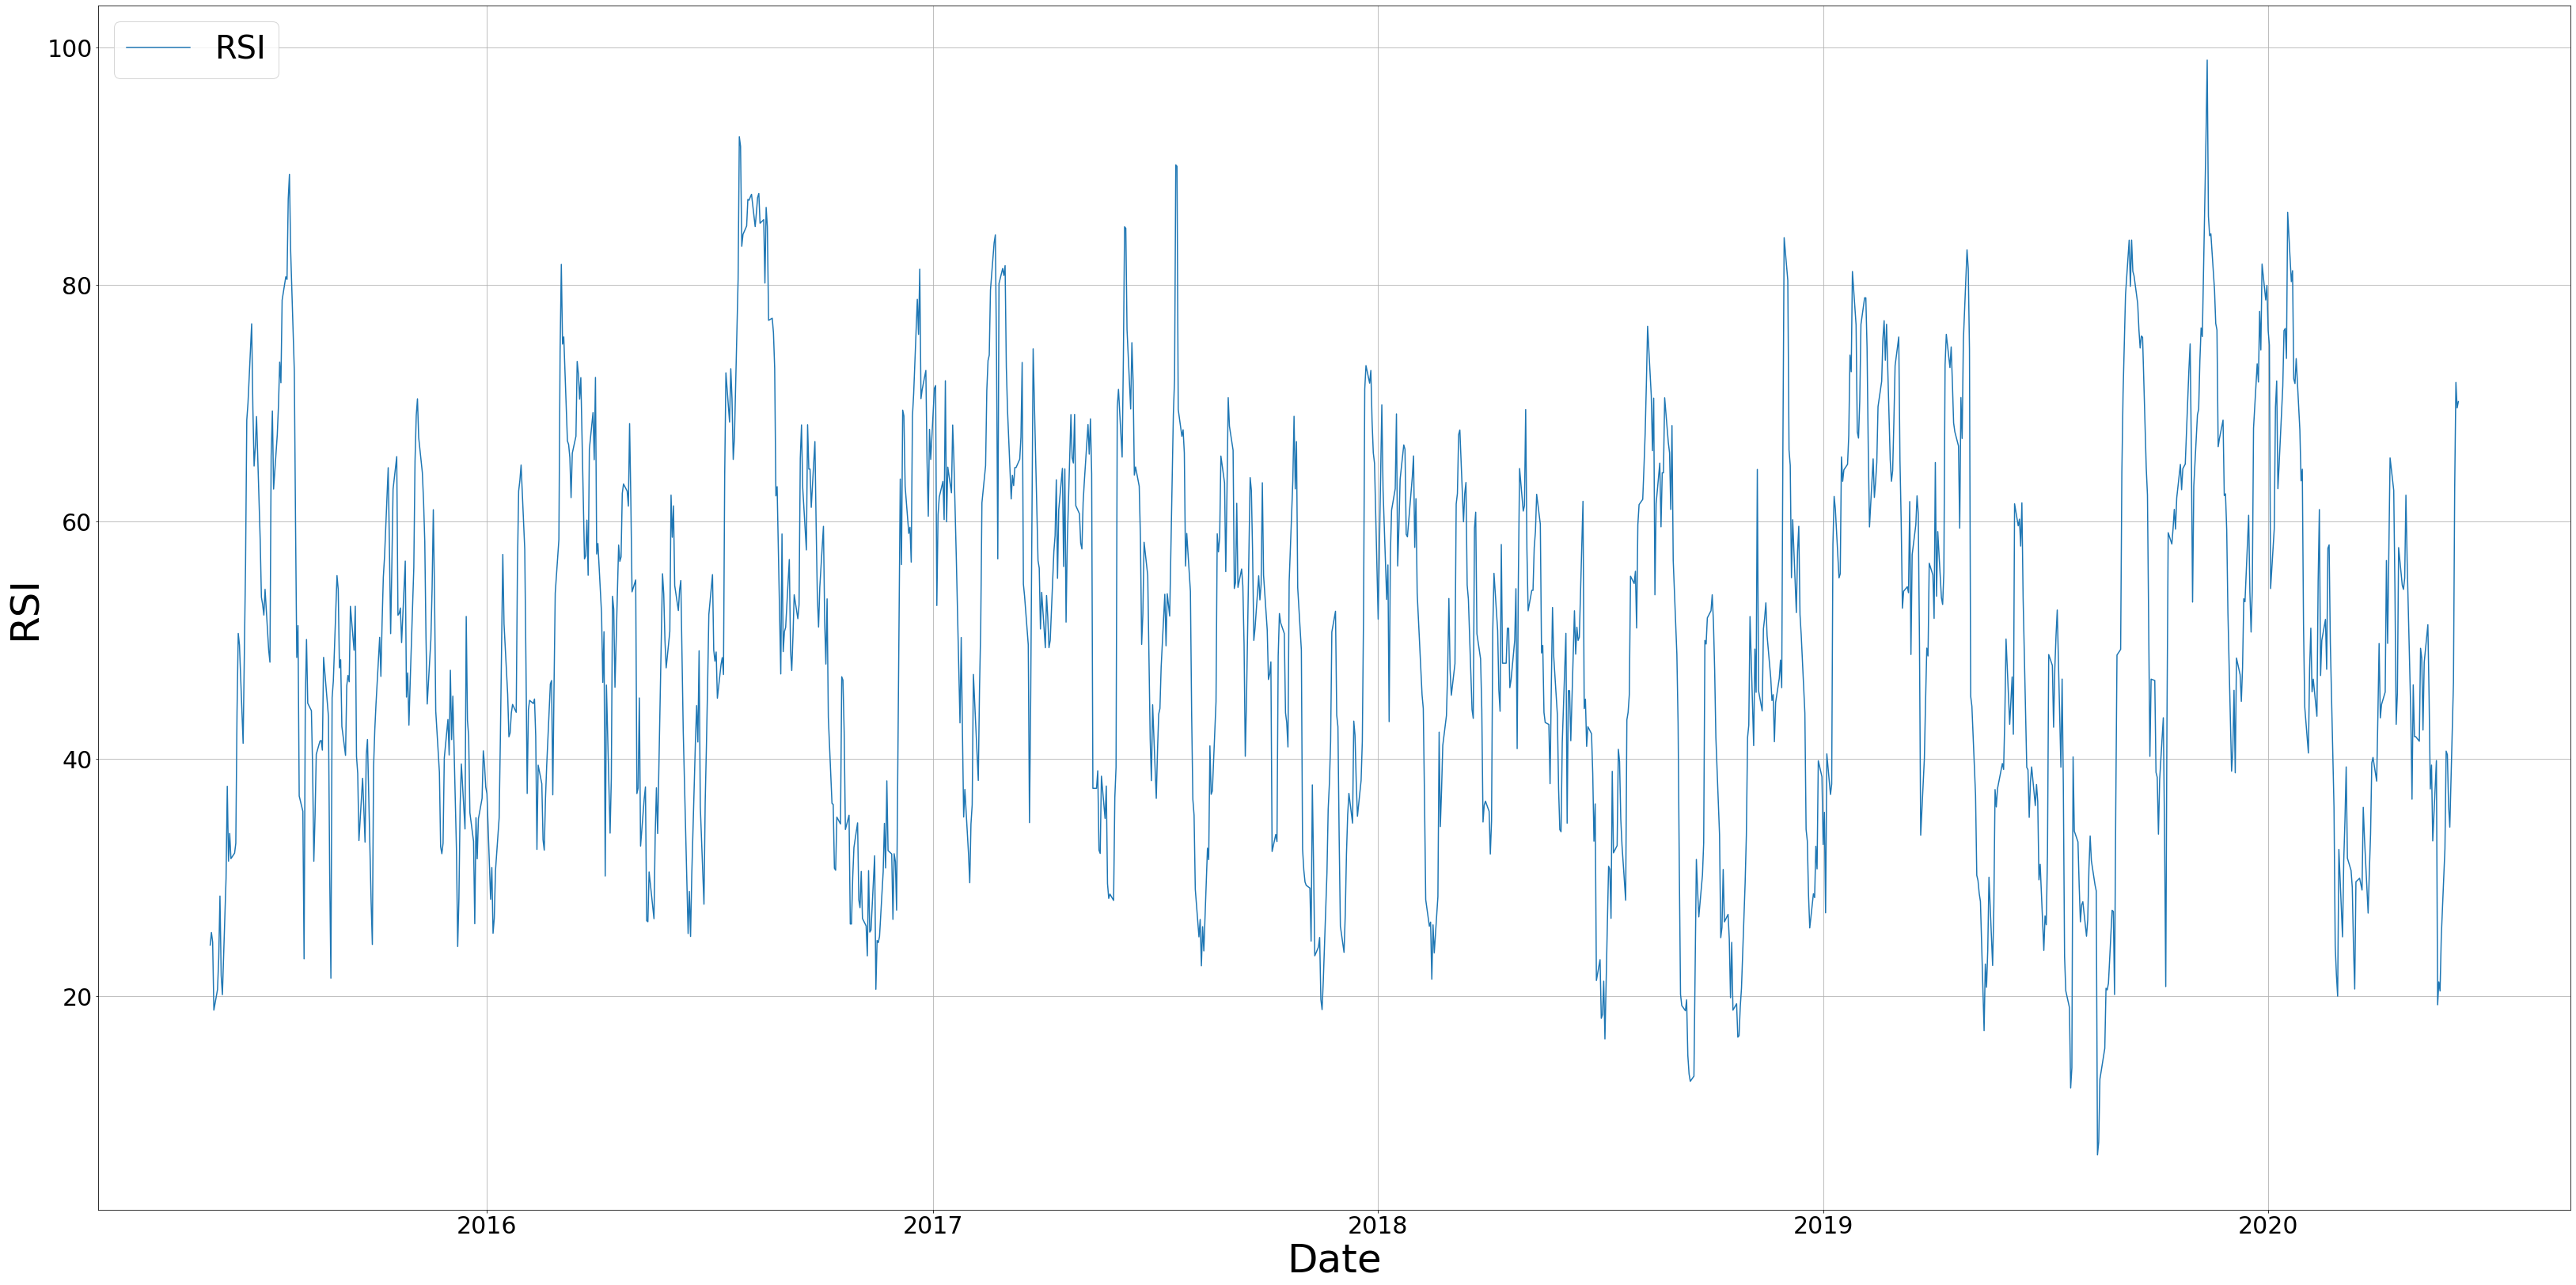

In [15]:
# Grafico la evolución del RSI

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(indra["RSI"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
ax1 = plt.ylabel("RSI", fontsize=50)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["RSI"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [16]:
# Genero la señal de compra y venta // sobrecompra(-1) -> RSI >= 70 - sobreventa(1) -> RSI <= 30

indra['Señal'] = np.where(indra.RSI >= 70, -1, np.where(indra.RSI <= 30, 1, 0))

In [17]:
# Visualizo una muestra

indra.tail(20)

,Precio,Retornos diarios,Ganancias,Perdidas,Media ganancias,Media perdidas,RS,RSI,Señal
Date,,,,,,,,,
2020-05-11,7.580,-0.135,0.000,-0.135,0.069286,-0.065714,1.054348,51.322751,0
2020-05-12,7.250,-0.330,0.000,-0.330,0.069286,-0.083929,0.825532,45.221445,0
2020-05-13,7.015,-0.235,0.000,-0.235,0.060357,-0.100714,0.599291,37.472284,0
2020-05-14,6.950,-0.065,0.000,-0.065,0.060357,-0.092500,0.652510,39.485981,0
2020-05-15,6.880,-0.070,0.000,-0.070,0.048214,-0.097500,0.494505,33.088235,0
2020-05-18,7.120,0.240,0.240,0.000,0.064643,-0.097500,0.663004,39.867841,0
2020-05-19,6.935,-0.185,0.000,-0.185,0.026429,-0.110714,0.238710,19.270833,1
2020-05-20,6.860,-0.075,0.000,-0.075,0.026429,-0.098214,0.269091,21.203438,1
2020-05-21,6.795,-0.065,0.000,-0.065,0.026429,-0.102857,0.256944,20.441989,1


In [18]:
# Genero un nuevo dataframe donde ver los resultados de la estrategia

Resultados = indra.loc[:,['Precio', 'Señal']]
Resultados.head()

,Precio,Señal
Date,,
2015-04-30,10.560,0
2015-05-01,10.560,0
2015-05-04,10.710,0
2015-05-05,10.335,0
2015-05-06,10.390,0


In [19]:
# Creo la variable que muestra los resultados

Resultados['Mean Rev'] = 100

for i in range(1, len(Resultados)):
    
    Resultados['Mean Rev'].iloc[i] = Resultados['Mean Rev'].iloc[i-1]*(1+Resultados.Señal.iloc[i-1]*
                                                                          (Resultados.Precio.iloc[i]/Resultados.Precio.iloc[i-1]-1))

In [20]:
# Visualizo una muestra

Resultados.tail(20)

,Precio,Señal,Mean Rev
Date,,,
2020-05-11,7.580,0,118.585380
2020-05-12,7.250,0,118.585380
2020-05-13,7.015,0,118.585380
2020-05-14,6.950,0,118.585380
2020-05-15,6.880,0,118.585380
2020-05-18,7.120,0,118.585380
2020-05-19,6.935,1,118.585380
2020-05-20,6.860,1,117.302914
2020-05-21,6.795,1,116.191443


In [21]:
# Genero el Buy&Hold para hacer la comparación

Resultados['Buy&Hold'] = 100

for i in range(1, len(Resultados)):
    
    Resultados['Buy&Hold'].iloc[i] = Resultados['Buy&Hold'].iloc[i-1]*(1+(Resultados.Precio.iloc[i]/
                                                                         Resultados.Precio.iloc[i-1]-1))

In [22]:
# Visualizo una muestra

Resultados.sample(20)

,Precio,Señal,Mean Rev,Buy&Hold
Date,,,,
2016-05-31,10.250,0,115.923674,97.064394
2017-10-02,13.110,0,127.325786,124.147727
2017-07-18,13.710,-1,127.357616,129.829545
2016-05-10,10.180,0,114.660620,96.401515
2018-11-14,8.520,0,129.162742,80.681818
2019-04-16,10.340,-1,125.788238,97.916667
2015-10-02,9.432,0,115.460453,89.318182
2016-12-16,10.325,-1,113.682846,97.774621
2017-11-01,12.300,0,127.325786,116.477273


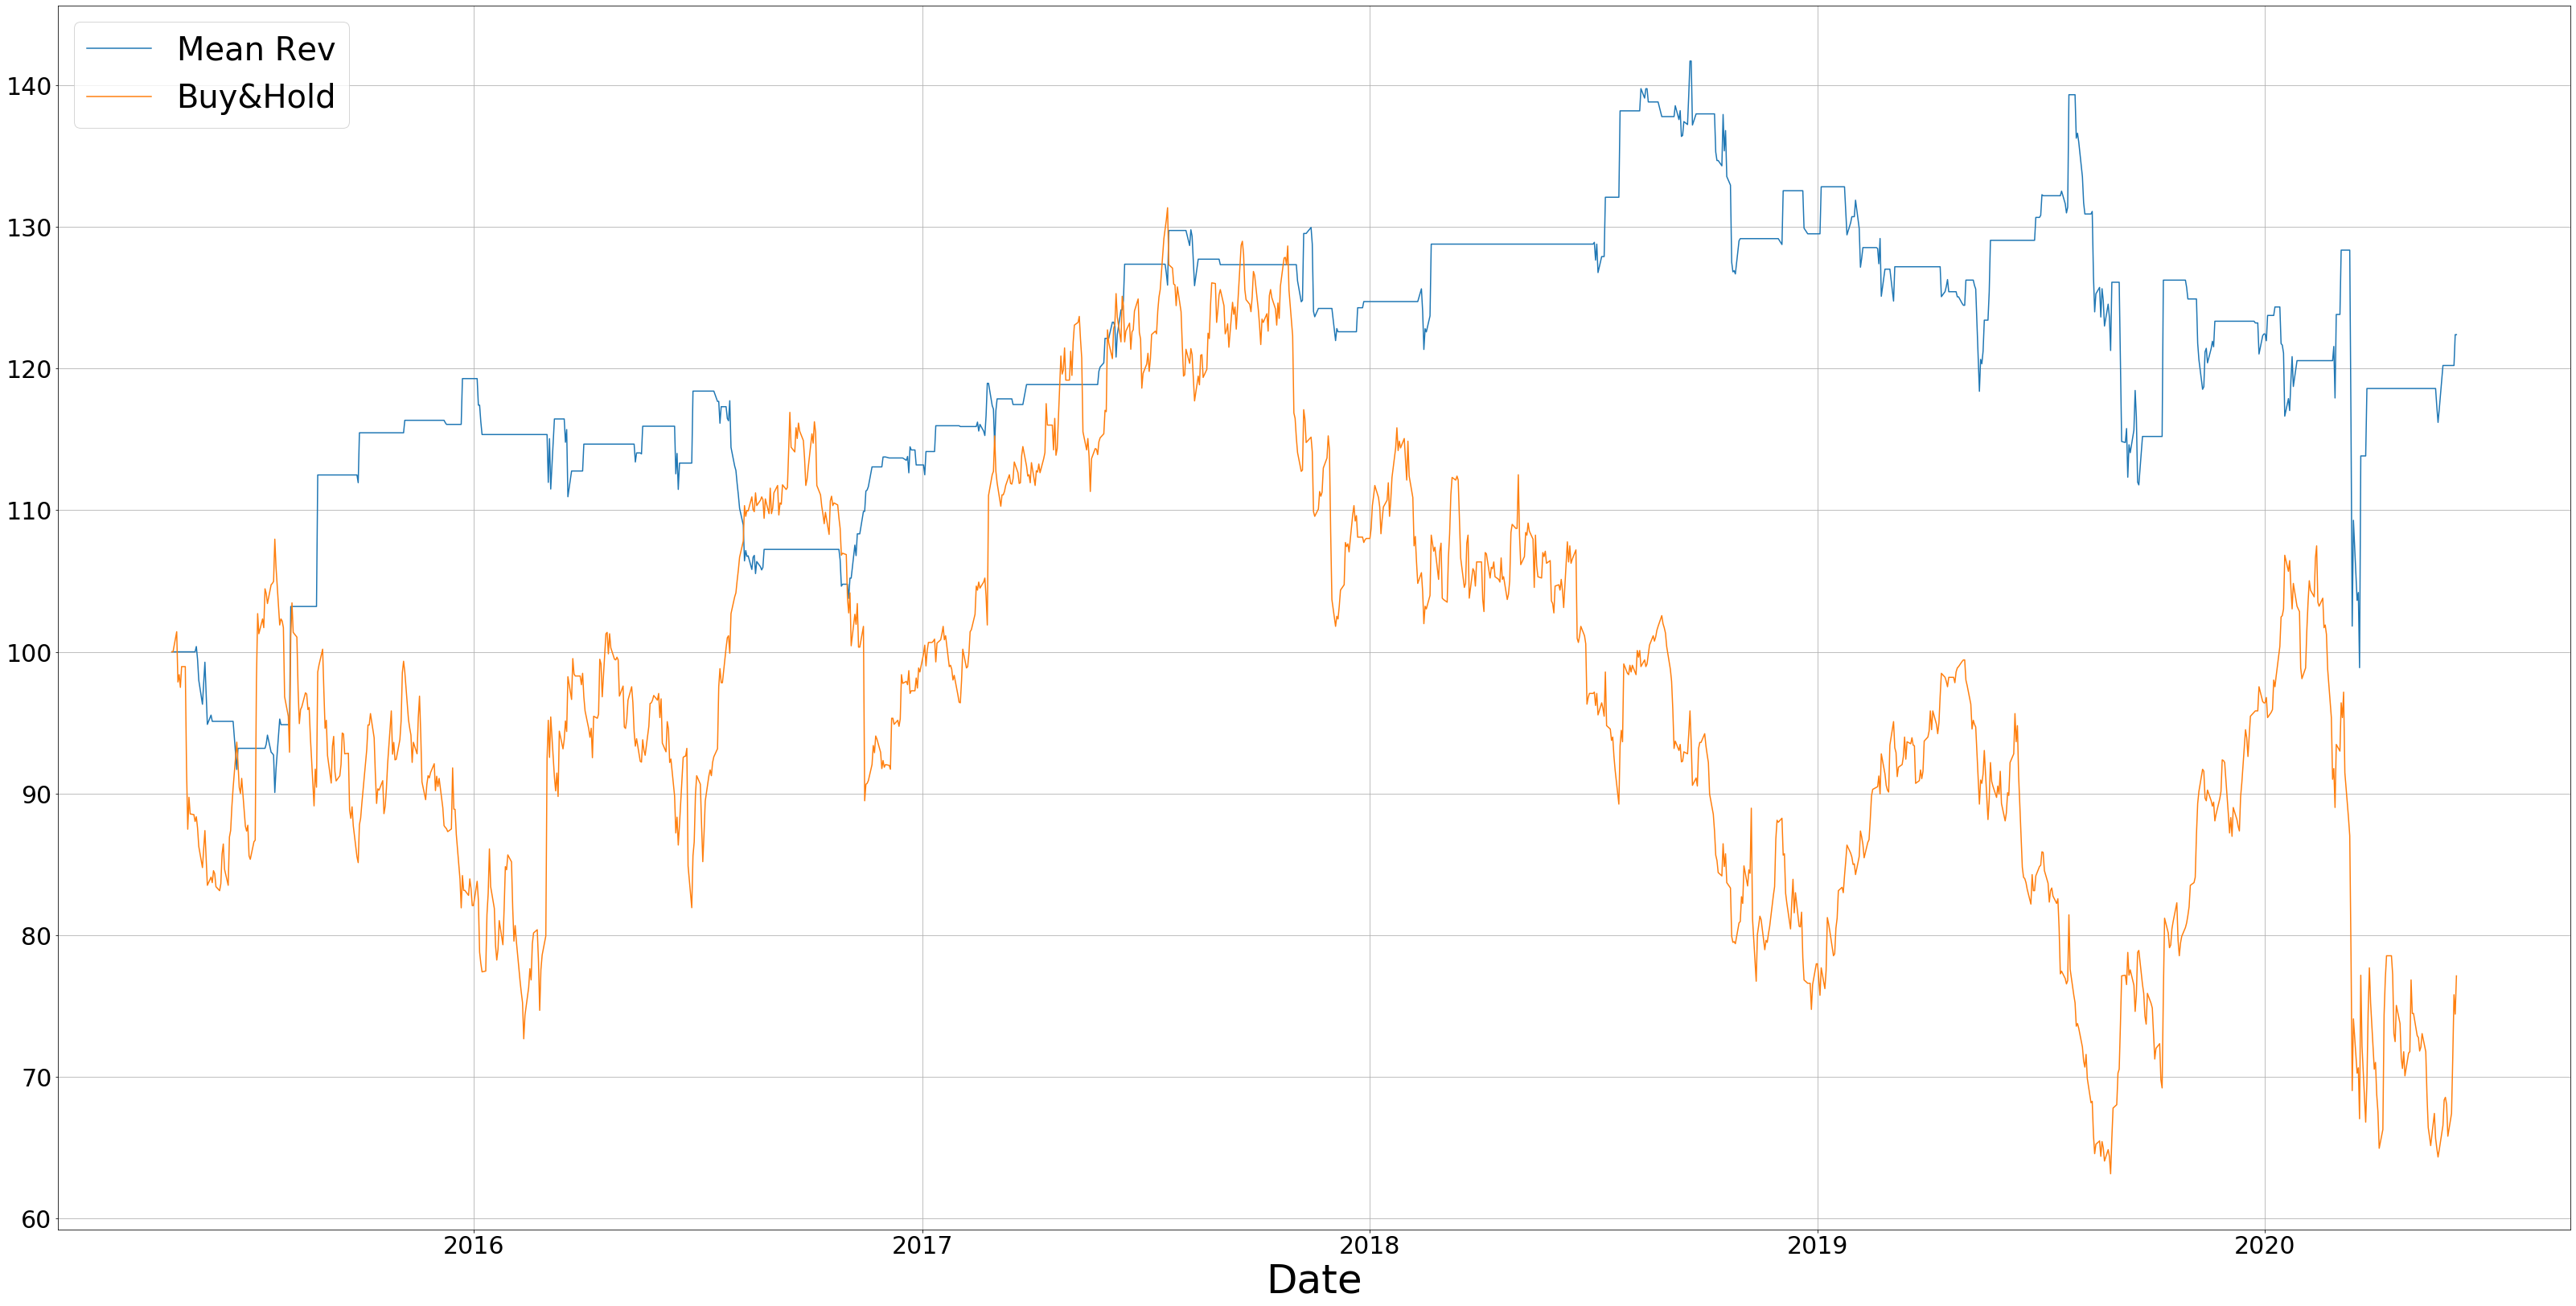

In [23]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(Resultados["Mean Rev"])
ax1 = plt.plot(Resultados["Buy&Hold"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Mean Rev", "Buy&Hold"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [26]:
indra_RSI = pd.DataFrame(Resultados.loc[:, 'Mean Rev'])
indra_RSI.columns = ['MeanRev_Indra']
indra_RSI

,MeanRev_Indra
Date,
2015-04-30,100.000000
2015-05-01,100.000000
2015-05-04,100.000000
2015-05-05,100.000000
2015-05-06,100.000000
2015-05-07,100.000000
2015-05-08,100.000000
2015-05-11,100.000000
2015-05-12,100.000000


In [28]:
indra_RSI.to_csv('./data_resultante/indra_RSI.csv')